In [1]:
import nltk
import nltk.corpus

In [2]:
from nltk.tokenize import word_tokenize

In [3]:
# sample string
genAI =  'Modern generative AI is based mainly on deep learning technique, therefore generative AI also started rapidly developing in the 2010s. Deep learning is a type of machine learning that employs multi-layered neural networks that self-train on a large dataset.'

# tokenizing our sample string
genAItokenize = word_tokenize(genAI)
genAItokenize

['Modern',
 'generative',
 'AI',
 'is',
 'based',
 'mainly',
 'on',
 'deep',
 'learning',
 'technique',
 ',',
 'therefore',
 'generative',
 'AI',
 'also',
 'started',
 'rapidly',
 'developing',
 'in',
 'the',
 '2010s',
 '.',
 'Deep',
 'learning',
 'is',
 'a',
 'type',
 'of',
 'machine',
 'learning',
 'that',
 'employs',
 'multi-layered',
 'neural',
 'networks',
 'that',
 'self-train',
 'on',
 'a',
 'large',
 'dataset',
 '.']

In [5]:
# check frequency of tokens
from nltk.probability import FreqDist

freq_dist = FreqDist()

for _ in genAItokenize:
    freq_dist[_] = freq_dist[_] + 1

freq_dist

FreqDist({'learning': 3, 'generative': 2, 'AI': 2, 'is': 2, 'on': 2, '.': 2, 'a': 2, 'that': 2, 'Modern': 1, 'based': 1, ...})

In [8]:
# retrieve most common tokens
five_most_occuring_word = freq_dist.most_common(5)
five_most_occuring_word

[('learning', 3), ('generative', 2), ('AI', 2), ('is', 2), ('on', 2)]

In [10]:
# obtain n combination of tokens - basic driver for contextualization.
grouped_tokens = list(nltk.ngrams(genAItokenize, 3))
grouped_tokens

[('Modern', 'generative', 'AI'),
 ('generative', 'AI', 'is'),
 ('AI', 'is', 'based'),
 ('is', 'based', 'mainly'),
 ('based', 'mainly', 'on'),
 ('mainly', 'on', 'deep'),
 ('on', 'deep', 'learning'),
 ('deep', 'learning', 'technique'),
 ('learning', 'technique', ','),
 ('technique', ',', 'therefore'),
 (',', 'therefore', 'generative'),
 ('therefore', 'generative', 'AI'),
 ('generative', 'AI', 'also'),
 ('AI', 'also', 'started'),
 ('also', 'started', 'rapidly'),
 ('started', 'rapidly', 'developing'),
 ('rapidly', 'developing', 'in'),
 ('developing', 'in', 'the'),
 ('in', 'the', '2010s'),
 ('the', '2010s', '.'),
 ('2010s', '.', 'Deep'),
 ('.', 'Deep', 'learning'),
 ('Deep', 'learning', 'is'),
 ('learning', 'is', 'a'),
 ('is', 'a', 'type'),
 ('a', 'type', 'of'),
 ('type', 'of', 'machine'),
 ('of', 'machine', 'learning'),
 ('machine', 'learning', 'that'),
 ('learning', 'that', 'employs'),
 ('that', 'employs', 'multi-layered'),
 ('employs', 'multi-layered', 'neural'),
 ('multi-layered', 'neur

In [11]:
# stemming - a process to obtain the base form of any word 
from nltk.stem import  PorterStemmer

In [14]:

portstem = PorterStemmer()

result = portstem.stem('administering')
result

'administ'

In [15]:
# lemmatization -  a process of reducing word to their dictionary form. A more enhanced version to stemming
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer

In [19]:
word_to_stem = ['cats', 'cacti']
lemma =  WordNetLemmatizer()

result = {data: lemma.lemmatize(data) for data in word_to_stem}
result

{'cats': 'cat', 'cacti': 'cactus'}

In [21]:
# parts of speech tagging with nltk
statement =  'why do you bother to eat Adel if you are not hungry'

# firstly create a work token
st_token =  word_tokenize(statement)

# Pass the list of tokens and create its part of speech 
result = nltk.pos_tag(st_token)

result

[('why', 'WRB'),
 ('do', 'VBP'),
 ('you', 'PRP'),
 ('bother', 'VB'),
 ('to', 'TO'),
 ('eat', 'VB'),
 ('Adel', 'NNP'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('not', 'RB'),
 ('hungry', 'JJ')]

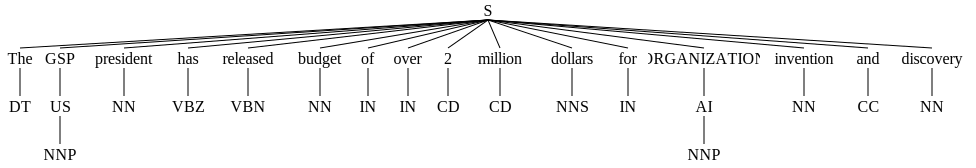

In [27]:
import svgling # this module has a function that can draw the tree for the NE relationship

# named entity recognition
statement = 'The US president has released budget of over 2 million dollars for AI invention and discovery'

# firstly obtain its token
st_token =  word_tokenize(statement)

# secondly, obtain its part of speech for each word
result = nltk.pos_tag(st_token)

# thirdly, invoke the named entity module and pass the tagged data
final_output = nltk.ne_chunk(result)
final_output



## Introducing Spacy...

In [28]:
import spacy

In [29]:
# load the package
nlp =  spacy.load('en_core_web_sm')

In [31]:
statement = 'The US president has released budget of over 2 million dollars for AI invention and discovery'
spacy_data = nlp(statement)


for data in spacy_data:
    print(data.i, data.text, data.pos_) # print each value index position, text and part of speech

0 The DET
1 US PROPN
2 president NOUN
3 has AUX
4 released VERB
5 budget NOUN
6 of ADP
7 over ADP
8 2 NUM
9 million NUM
10 dollars NOUN
11 for ADP
12 AI PROPN
13 invention NOUN
14 and CCONJ
15 discovery NOUN


In [35]:
for data in spacy_data.ents: # obtaining the named entity for each item on the doc
    print(data.text, data.label_) 

US GPE
over 2 million dollars MONEY


In [36]:
# matcher
from spacy.matcher import Matcher

In [52]:
# using matcher to extract any substring from a string
statement = 'The US president has released budget of over 2 million dollars for AI invention and discovery'

# create a doc 
doc = nlp(statement)

# invoke the matcher class
matcher = Matcher(nlp.vocab)

# pattern we are interested in extracting
pattern =  [{"ORTH" : "president"}, {"LOWER": "invention"}, {"IS_DIGIT": True}, {"ENT_TYPE": "2 million dollars"}]

matcher.add('AI', [pattern])
matches = matcher(doc)

In [54]:
# to obtain the matched items
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

## Sentiment Analysis

In [58]:
import nltk
import random
import re
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.tokenize import word_tokenize

import pickle
from sklearn.linear_model import LogisticRegression, SGDClassifier
from nltk.classify import ClassifierI
from sklearn.svm import SVC
import os


In [59]:
# Load the documents - the reviews( both positive and negative)

In [ ]:
# first task - create a list of tuples (where the first element is the review and the second is the label - "positive")

# second tasks - remove punctuations (optional)

# third task - remove all stop words
# we will need the package
from nltk.corpus import stopwords
import re 

# create a list of stop words from a particular language(English)
stopwords_list = list(set(stopwords.words('english')))

# fourth task - part of speech tagging

# fifth task - make a list of all the adjectives identified